In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


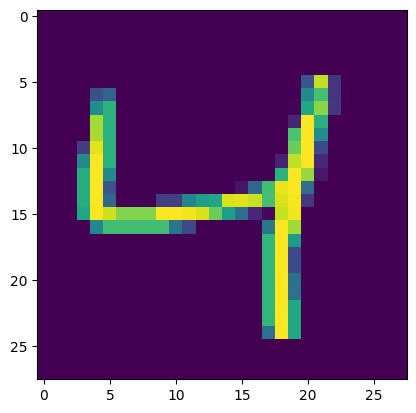

In [4]:

plt.imshow(X_train[2])

In [5]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [6]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
model = Sequential()
# Add model layers
model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

/Users/praveenbhandari/Desktop/mlp/mlp/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# !pip install --upgrade tensorflow

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
# hist = model.fit(X_train,y_train_one_hot, validation_data=(X_test,y_test_one_hot), epochs=5)

In [17]:
import numpy as np
import random

In [18]:
class neuron():
    def __init__(self,bias):
        self.bias=bias
        self.weights=[]

    # def sigmoid(self,x):
    #     return 1/(1+np.exp(-x))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -100, 100)))  # Clipping inputs to avoid large values

    
    def sum_input_to_hiddedn(self):
        sum=0
        for i in range(len(self.input)):
            sum += self.input[i]*self.weights[i]
            # print(sum)
        return sum+self.bias
    
    

    def cost(self,input):
        self.input=input
        self.output=self.sigmoid(self.sum_input_to_hiddedn())
        # print(self.output)
        return self.output
    
    def cal_error(self,target_op):
        return 0.5*np.square(target_op-self.output)
    
    def error_wrt_output(self, targer_op):
        return -(targer_op-self.output)


    def error_wrt_input(self):
        return self.output*(1-self.output)

    def total_error(self,targer_op):
        return self.error_wrt_input()*self.error_wrt_output(targer_op)
    

    # def error_wrt_weight(self,index):
    #     return self.input[index]

    

In [19]:
class network():
    def __init__(self,hidden_layer,bias):
        self.network=[]
        self.bias = bias if bias is not None else random.random()
        for _ in range(hidden_layer):
            self.network.append(neuron(self.bias))

    def forward(self,input):
        outputs=[]
        for i in self.network:
            outputs.append(i.cost(input))
        return outputs
    

    # def backPropogation(self,):
        

In [20]:
class all_network():
    def __init__(self,n_input_layer,n_hidden_layer,n_output_layer,hidden_weights,output_weights,hidden_bias,output_bias):
        self.hidden_l_network=network(n_hidden_layer,hidden_bias)
        self.output_l_network=network(n_output_layer,output_bias)
        self.n_input_layer=n_input_layer
        # self.hidden_weight_layer=self.add_weights_to_hidden(hidden_weights)
        # self.output_weight_layer=self.add_weights_to_output(output_weights)
        self.add_weights(self.hidden_l_network,hidden_weights,n_input_layer)
        self.add_weights(self.output_l_network,output_weights,n_hidden_layer)


    def add_weights(self, layer, weights, num_inputs):
        count = 0
        for neuron in layer.network:
            neuron.weights = weights[count:count + num_inputs]
            count += num_inputs
    # def add_weights_to_output(self,output_weights):
    #     count=0
    #     for i in range(len(self.output_l_network.network)):
    #         # print(hidden_l_network.network[i].weight)
    #         for j in range((self.n_input_layer)):
    #             self.output_l_network.network[i].weight.append(output_weights[count])
    #             count+=1

    def forward_hidden_op(self,input_data):
        # hidden_op=self.hidden_l_network.forward(input_data)
        # self.hidden_l_cost=self.hidden_l_network.forward(input_data)
        # print("Hidden layer outputs:", self.hidden_l_cost)
        # self.output_l_cost=self.output_l_network.forward(self.hidden_l_cost)
        # print("Output layer outputs:", self.output_l_cost)  # Print output layer outputs
        hidden_output = self.hidden_l_network.forward(input_data)
        # print(f"Hidden Layer Output: {hidden_output}")
        output = self.output_l_network.forward(hidden_output)
        # print(f"Output Layer Output: {output}")

        # return np.mean(output)
        return output
    
    def backPropogation(self, input_data, target_op,learning_rate=0.5):
        # Output layer deltas
        # self.forward_hidden_op(target_inp)
        hidden_output = self.hidden_l_network.forward(input_data)
        final_output = self.output_l_network.forward(hidden_output)

        # output_deltas = [0] * len(self.output_l_network.network)
        # for i in range(len(self.output_l_network.network)):
        #     output_deltas[i] = self.output_l_network.network[i].cal_error(target_op[i])

        # output_deltas = []
        output_deltas = [
            (target - output) * neuron.error_wrt_input()
            for target, output, neuron in zip(target_op, final_output, self.output_l_network.network)
        ]
        # hidden_deltas=[]
        
        # Hidden layer deltas
        hidden_deltas = []
        for i, hidden_neuron in enumerate(self.hidden_l_network.network):
            weighted_sum = sum(
                delta * output_neuron.weights[i]
                for delta, output_neuron in zip(output_deltas, self.output_l_network.network)
            )
            hidden_deltas.append(weighted_sum * hidden_neuron.error_wrt_input())

        # Update output layer weights and biases
        for neuron, delta in zip(self.output_l_network.network, output_deltas):
            neuron.weights = [
                weight + learning_rate * delta * hidden_output[i]
                for i, weight in enumerate(neuron.weights)
            ]
            neuron.bias += learning_rate * delta

        # Update hidden layer weights and biases
        for neuron, delta in zip(self.hidden_l_network.network, hidden_deltas):
            neuron.weights = [
                weight + learning_rate * delta * input_data[i]
                for i, weight in enumerate(neuron.weights)
            ]
            neuron.bias += learning_rate * delta



    def calculate_total_error(self, dataset):
        total_error = 0
        for input_data, target_op in dataset:
            outputs = self.forward_hidden_op(input_data)
            total_error += sum(0.5 * (target_op[i] - outputs[i]) ** 2 for i in range(len(target_op)))
        return total_error






In [13]:
nn = all_network(2, 2, 2, hidden_weights=[0.15, 0.2, 0.25, 0.3], hidden_bias=0.35, output_weights=[0.4, 0.45, 0.5, 0.55], output_bias=0.6)
a=nn.forward_hidden_op([0.05, 0.1])
exp_logits = np.exp(a - np.max(a))  # Normalize for numerical stability
probabilities = exp_logits / np.sum(exp_logits)
print("Class probabilities:", probabilities)


Class probabilities: [0.49460936 0.50539064]


In [14]:
import numpy as np

# Instantiate the expanded network
nn = all_network(
    n_input_layer=5,
    n_hidden_layer=4,  # First hidden layer
    n_output_layer=3,  # Second hidden layer
    hidden_weights=np.random.rand(20).tolist(),  # 4 neurons * 5 inputs
    hidden_bias=0.5,   # Bias for each hidden layer neuron
    output_weights=np.random.rand(12).tolist(), # 3 neurons * 4 inputs
    output_bias=0.6    # Bias for each output layer neuron
)

# Input data
input_data = [0.1, 0.2, 0.3, 0.4, 0.5]

# Perform forward propagation
output = nn.forward_hidden_op(input_data)

# Display the output
print("Output from network:", output)


Output from network: [np.float64(0.9325486342326953), np.float64(0.9439366660089503), np.float64(0.9479151672367985)]


In [15]:
# Define a small dataset for testing
input_data = [0.05, 0.1]  # Input to the network
target_op = [0.01, 0.99]  # Desired output from the network

# Define initial weights and biases
hidden_weights = [0.15, 0.2, 0.25, 0.3]  # Weights connecting input to hidden layer
output_weights = [0.4, 0.45, 0.5, 0.55]  # Weights connecting hidden to output layer
hidden_bias = 0.35  # Bias for hidden layer neurons
output_bias = 0.6   # Bias for output layer neurons

# Create the neural network
nn = all_network(
    n_input_layer=2,
    n_hidden_layer=2,
    n_output_layer=2,
    hidden_weights=hidden_weights,
    hidden_bias=hidden_bias,
    output_weights=output_weights,
    output_bias=output_bias
)

# Print initial outputs (before training)
print("Initial Outputs:")
initial_output = nn.forward_hidden_op(input_data)
print(initial_output)

# Perform one step of backpropagation
learning_rate = 0.5
nn.backPropogation(input_data, target_op, learning_rate)

# Print updated weights and biases
print("\nUpdated Hidden Layer Weights and Biases:")
for i, neuron in enumerate(nn.hidden_l_network.network):
    print(f"Neuron {i + 1}: Weights={neuron.weights}, Bias={neuron.bias}")

print("\nUpdated Output Layer Weights and Biases:")
for i, neuron in enumerate(nn.output_l_network.network):
    print(f"Neuron {i + 1}: Weights={neuron.weights}, Bias={neuron.bias}")

# Print outputs after training
print("\nOutputs After Training:")
updated_output = nn.forward_hidden_op(input_data)
print(updated_output)


Initial Outputs:
[np.float64(0.7513650695523157), np.float64(0.7729284653214625)]

Updated Hidden Layer Weights and Biases:
Neuron 1: Weights=[np.float64(0.1497807161327628), np.float64(0.19956143226552567)], Bias=0.3456143226552565
Neuron 2: Weights=[np.float64(0.24975114363236958), np.float64(0.29950228726473915)], Bias=0.3450228726473914

Updated Output Layer Weights and Biases:
Neuron 1: Weights=[np.float64(0.35891647971788465), np.float64(0.4086661860762334)], Bias=0.5307507191857215
Neuron 2: Weights=[np.float64(0.5113012702387375), np.float64(0.5613701211079891)], Bias=0.6190491182582781

Outputs After Training:
[np.float64(0.7284417622337656), np.float64(0.7783769203009705)]


In [21]:
# XOR dataset
xor_inputs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]

xor_targets = [
    [0, 1],  # Output for [0, 0]
    [1, 0],  # Output for [0, 1]
    [1, 0],  # Output for [1, 0]
    [0, 1]   # Output for [1, 1]
]

# Initialize weights and biases
hidden_weights = [0.1, 0.2, 0.3, 0.4]  # Random initialization
output_weights = [0.5, 0.6, 0.7, 0.8]
hidden_bias = 0.35
output_bias = 0.6

# Create the network
nn = all_network(
    n_input_layer=2,
    n_hidden_layer=2,
    n_output_layer=2,
    hidden_weights=hidden_weights,
    hidden_bias=hidden_bias,
    output_weights=output_weights,
    output_bias=output_bias
)

# Train the network on the XOR problem
learning_rate = 0.5
epochs = 1000  # Number of training iterations

print("Training the XOR problem...")

for epoch in range(epochs):
    total_error = 0
    for input_data, target_op in zip(xor_inputs, xor_targets):
        nn.backPropogation(input_data, target_op, learning_rate)
        total_error += nn.calculate_total_error([(input_data, target_op)])
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Total Error: {total_error:.6f}")

# Test the network
print("\nTesting the XOR problem...")
for input_data in xor_inputs:
    output = nn.forward_hidden_op(input_data)
    print(f"Input: {input_data}, Predicted Output: {output}")


Training the XOR problem...
Epoch 0, Total Error: 1.312864
Epoch 100, Total Error: 0.952046
Epoch 200, Total Error: 0.956877
Epoch 300, Total Error: 0.959967
Epoch 400, Total Error: 0.961817
Epoch 500, Total Error: 0.962546
Epoch 600, Total Error: 0.960888
Epoch 700, Total Error: 0.948675
Epoch 800, Total Error: 0.887187
Epoch 900, Total Error: 0.762480

Testing the XOR problem...
Input: [0, 0], Predicted Output: [np.float64(0.17185679895761477), np.float64(0.8320557146467397)]
Input: [0, 1], Predicted Output: [np.float64(0.6258499406911979), np.float64(0.3708986021273134)]
Input: [1, 0], Predicted Output: [np.float64(0.6318516245795388), np.float64(0.3688753220628999)]
Input: [1, 1], Predicted Output: [np.float64(0.6383103467889611), np.float64(0.35424198726289746)]


In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train
y_train = y_train
X_test = X_test
y_test = y_test
X_train_1 = X_train[:1000]
y_train_1 = y_train[:1000]
X_test_1 = X_test[:1000]
y_test_1 = y_test[:1000]
# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  # Normalize and flatten
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# Initialize the network
input_size = 784
hidden_layer_size = 64
output_layer_size = 10

hidden_weights = np.random.rand(hidden_layer_size * input_size) * 0.1
output_weights = np.random.rand(output_layer_size * hidden_layer_size) * 0.1
hidden_bias = 0.1
output_bias = 0.1

nn = all_network(
    n_input_layer=input_size,
    n_hidden_layer=hidden_layer_size,
    n_output_layer=output_layer_size,
    hidden_weights=hidden_weights.tolist(),
    hidden_bias=hidden_bias,
    output_weights=output_weights.tolist(),
    output_bias=output_bias
)

# Train the network
epochs = 5
learning_rate = 0.1
batch_size = 32
output = nn.forward_hidden_op(X_test[0])
predicted_class = np.argmax(output)
print("Prediction before training:", predicted_class)
print("\nTraining the network on MNIST data...")

for epoch in range(epochs):
    total_error = 0
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train_onehot[i:i+batch_size]
        for input_data, target_output in zip(batch_X, batch_y):
            nn.backPropogation(input_data.tolist(), target_output.tolist(), learning_rate)
            total_error += nn.calculate_total_error([(input_data.tolist(), target_output.tolist())])
    print(f"Epoch {epoch + 1}/{epochs}, Total Error: {total_error:.6f}")

# Test the network
correct_predictions = 0
for input_data, target_label in zip(X_test, y_test):
    predicted_output = nn.forward_hidden_op(input_data.tolist())
    predicted_class = predicted_output.index(max(predicted_output))
    if predicted_class == target_label:
        correct_predictions += 1

accuracy = correct_predictions / len(X_test)
print(f"\nAccuracy on MNIST test data: {accuracy * 100:.2f}%")
output_after_training = nn.forward_hidden_op(X_test[0])
predicted_class_after_training = np.argmax(output_after_training)

# Print the network's prediction after training
print("Prediction after training:", predicted_class_after_training)

# Print the actual target class
actual_class = np.argmax(y_test_onehot[0])
print("Actual class:", actual_class)
print("after train",output)


Prediction before training: 3

Training the network on MNIST data...
Epoch 1/5, Total Error: 9139.620941
Epoch 2/5, Total Error: 2195.848908
Epoch 3/5, Total Error: 1924.854084
Epoch 4/5, Total Error: 1782.671257
Epoch 5/5, Total Error: 1668.967155

Accuracy on MNIST test data: 93.80%
Prediction after training: 7
Actual class: 7
after train [np.float64(0.9681478106756721), np.float64(0.9654559298175209), np.float64(0.9559403131723999), np.float64(0.9712328651655572), np.float64(0.9690818226041124), np.float64(0.9564146843861848), np.float64(0.963861185789479), np.float64(0.9665142734788169), np.float64(0.9640462778014949), np.float64(0.9555501801353329)]


In [35]:
import pickle

# Save the model to a file
with open("mnist_network_model.pkl", "wb") as file:
    pickle.dump(nn, file)

print("Model saved successfully!")


Model saved successfully!


In [30]:
# Print the actual target class
actual_class = np.argmax(y_test_onehot[0])
print("Actual class:", actual_class)
print("after train",output)


Actual class: 7
after train [np.float64(0.9569208496791848), np.float64(0.9621703502679856), np.float64(0.9626856005098301), np.float64(0.9721810422144805), np.float64(0.9565162256581629), np.float64(0.9523248661276887), np.float64(0.9576968712211601), np.float64(0.9445013860547323), np.float64(0.9643497251120839), np.float64(0.9640974021710926)]


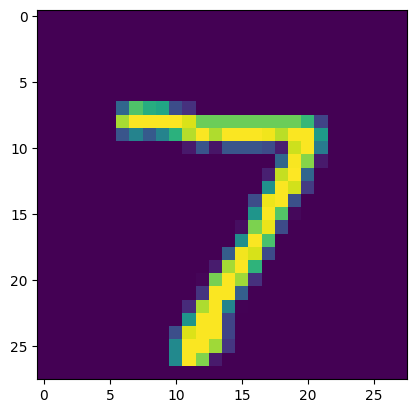

In [34]:
plt.imshow(X_test_1[0])

In [26]:
input_sample = X_train[0]
target_sample = y_train_onehot[0]

# Forward pass
output = nn.forward_hidden_op(input_sample)

# Print the network's prediction before training
predicted_class = np.argmax(output)
print("Prediction before training:", predicted_class)

# Perform backpropagation
nn.backPropogation(input_sample, target_sample, learning_rate=0.1)

# Forward pass again after backpropagation
output_after_training = nn.forward_hidden_op(input_sample)
predicted_class_after_training = np.argmax(output_after_training)

# Print the network's prediction after training
print("Prediction after training:", predicted_class_after_training)

# Print the actual target class
actual_class = np.argmax(target_sample)
print("Actual class:", actual_class)

Prediction before training: 6
Prediction after training: 6
Actual class: 5


In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
# X_train.shape
X_train[0].shape

(28, 28)

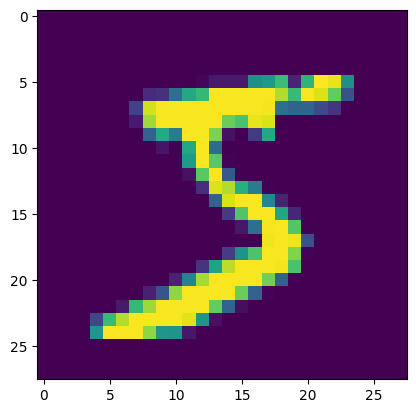

In [10]:

import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [11]:
# def __init__(self,n_input_layer,n_hidden_layer,n_output_layer,hidden_weights,output_weights,hidden_bias,output_bias):

hidden_weights=np.random.rand(764 * 50) * 0.1
output_weight=np.random.rand(10 * 50) * 0.1

nn = all_network(764, 50, 10, hidden_weights, hidden_bias=0.1, output_weights=output_weight, output_bias=0.1)
a=nn.forward_hidden_op(X_train[0])
a

[array([0.78521205, 0.78521205, 0.78521205, 0.78521205, 0.91346952,
        0.91514751, 0.91517588, 0.91519337, 0.91519339, 0.91519339,
        0.91519339, 0.91519339, 0.91519339, 0.91519339, 0.91519339,
        0.91519339, 0.91519339, 0.91519339, 0.91519339, 0.91519339,
        0.91514659, 0.91515738, 0.91513378, 0.91351347, 0.78521205,
        0.78521205, 0.78521205, 0.78521205]),
 array([0.80338478, 0.80338478, 0.80338478, 0.80338478, 0.92967899,
        0.93023925, 0.93025007, 0.93026304, 0.93026305, 0.93026305,
        0.93026305, 0.93026305, 0.93026305, 0.93026305, 0.93026305,
        0.93026305, 0.93026305, 0.93026305, 0.93026305, 0.93026305,
        0.93024994, 0.930253  , 0.93024661, 0.92968616, 0.80338478,
        0.80338478, 0.80338478, 0.80338478]),
 array([0.79815573, 0.79815573, 0.79815573, 0.79815573, 0.92547699,
        0.92607347, 0.92608563, 0.92610212, 0.92610213, 0.92610213,
        0.92610213, 0.92610213, 0.92610213, 0.92610213, 0.92610213,
        0.92610213, 0.92

In [12]:
a=np.array(a)
class_predictions = a.argmax()
value=class_predictions
min_value = 1
max_value = 10
normalized_value = min_value + (value - np.min([value, min_value])) * (max_value - min_value) / (np.max([value, max_value]) - np.min([value, min_value]))

print(normalized_value)

10.0


In [42]:
epochs = 10
learning_rate = 0.1

for epoch in range(epochs):
    for i in range(len(X_train)):
        input_data = X_train[i]
        target_output = y_train[i]
        
        # Perform forward and backward pass
        nn.forward_hidden_op(input_data)
        nn.backPropogation(input_data, target_output, learning_rate)
    
    # Calculate total error for the epoch
    total_error = nn.calculate_total_error(zip(X_train, y_train))
    print(f"Epoch {epoch+1}, Total Error: {total_error:.4f}")


TypeError: object of type 'numpy.uint8' has no len()

In [ ]:
correct_predictions = 0

for i in range(len(X_test)):
    input_data = X_test[i]
    target_output = y_test[i]
    
    # Forward pass
    output = nn.forward_hidden_op(input_data)
    
    # Check if the predicted label matches the actual label
    if np.argmax(output) == np.argmax(target_output):
        correct_predictions += 1

accuracy = correct_predictions / len(X_test)
print(f"Test Accuracy: {accuracy:.2%}")


SHIT down

In [ ]:
nn = all_network(2, 2, 2, hidden_weights=[0.15, 0.2, 0.25, 0.3], hidden_bias=0.35, output_weights=[0.4, 0.45, 0.5, 0.55], output_bias=0.6)

# dataset = [([0.05, 0.1], [0.01, 0.99])]

# for epoch in range(100):
#     nn.backPropogation([0.05, 0.1], [0.01, 0.99])
#     if epoch % 10 == 0:
#         print(f"Epoch {epoch}: Error = {nn.calculate_total_error(dataset)}")
errors = []
for i in range(10):
    nn.backPropogation([0.05, 0.1], [0.01, 0.99])
    error = round(nn.calculate_total_error([([0.05, 0.1], [0.01, 0.99])]), 9)
    errors.append(error)
    # print(i, round(nn.calculate_total_error([[[0.05, 0.1], [0.01, 0.99]]]), 9))
    print(i,error)
plt.plot(range(10), errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Loss Over Epochs')
plt.show()

TypeError: all_network.__init__() got an unexpected keyword argument 'hidden_weights'

In [46]:
# inp_lay=784
# hidden_lay=64
# op_lay=10
# hidden_weights=np.random.rand(inp_lay * hidden_lay)
# output_weights = np.random.rand(op_lay * hidden_lay)
# hid_bias=np.random.rand()
# op_bias=np.random.rand()
# # print(len(hidden_weights))
# # print(len(output_weights))
# # print(op_bias)

In [47]:
inp_lay=784
hidden_lay=64
op_lay=10
hidden_weights=np.random.rand(inp_lay * hidden_lay)*0.1
output_weights = np.random.rand(op_lay * hidden_lay)*0.1
hid_bias=np.random.rand()
op_bias=np.random.rand()
mnist_network = all_network(inp_lay, hidden_lay, op_lay,hidden_weights, output_weights, hid_bias, op_bias)
input_data = np.random.rand(inp_lay)  # Random input data (e.g., 784 features for one image)
target_op = np.random.rand(op_lay)  # Random target output (e.g., 10 classes)

# epochs = 5
# for epoch in range(epochs):
#     mnist_network.backPropogation(input_data, target_op, learning_rate=0.01)
#     error = mnist_network.calculate_total_error([(input_data, target_op)])
#     print(f"Total error: {error}")
# epochs = 10
# learning_rate = 0.1


In [48]:

# a=np.random.rand(inp_lay * hidden_lay)
# hidden_weights=np.random.rand(inp_lay * hidden_lay)*0.1
# print(a[0],hidden_weights[0])

In [49]:
# input_data = X_train.reshape(784,)
# input_data.shape

from sklearn.preprocessing import OneHotEncoder
X_train_flattened = X_train.reshape(-1, 784) / 255.0
X_train_flattened.shape
# Instantiate the encoder with sparse_output set to False
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the labels into one-hot encoded format
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))

Epoch 1/0, Total Error: 84.70997609786079
Epoch 2/1, Total Error: 41.895059393639904
Epoch 3/2, Total Error: 41.914483844124206
Epoch 4/3, Total Error: 41.916306646204646
Epoch 5/4, Total Error: 41.91549906522271
Epoch 6/5, Total Error: 41.91412854858893
Epoch 7/6, Total Error: 41.91262695458628
Epoch 8/7, Total Error: 41.91109051686448
Epoch 9/8, Total Error: 41.90953982282212
Epoch 10/9, Total Error: 41.90797763632672


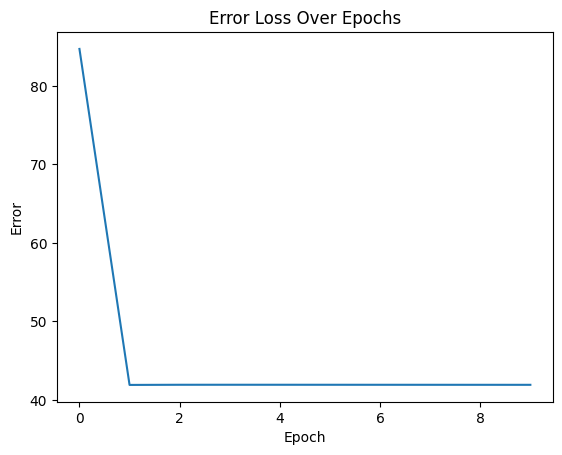

In [50]:
import matplotlib.pyplot as plt
errors=[]
for e in range(10):
    total_error = 0
    for i in range(len(X_train_flattened[:100])):
        # Print the current image index being trained on
        # print(f"Training on image {i + 1}/{len(X_train_flattened[:1000])}")
        
        # Display the current training image
        # if i % 100 == 0:  # Display every 100th image to avoid too many outputs
        #     plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
        #     plt.title(f"Training Image: {i + 1}")
        #     plt.show()

        # Backpropagation for the current image
        mnist_network.backPropogation(X_train_flattened[i], y_train_one_hot[i], 0.1)
        total_error += mnist_network.calculate_total_error([(X_train_flattened[i], y_train_one_hot[i])])
    errors.append(total_error)
    print(f"Epoch {e + 1}/{e}, Total Error: {total_error}")
plt.plot(range(10), errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Loss Over Epochs')
plt.show()

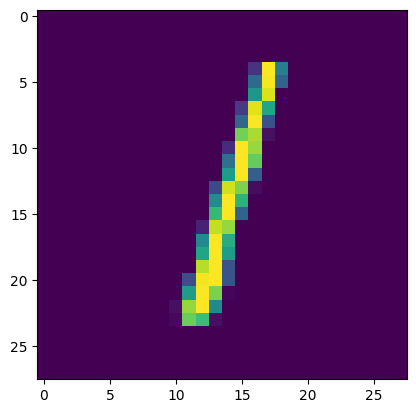

In [51]:

plt.imshow(X_test[2])

In [60]:
len(X_test[2])

28

In [56]:
aa=mnist_network.forward_hidden_op(X_test[2])
len(aa)

10

In [72]:
aa[9]

array([[0.22385089],
       [0.22385089],
       [0.22385089],
       [0.22385089],
       [0.22385089],
       [0.22385089],
       [0.22385089],
       [0.22385089],
       [0.22385089],
       [0.22385089],
       [0.14562695],
       [0.06274676],
       [0.06274639],
       [0.06274639],
       [0.06274639],
       [0.06274639],
       [0.06274639],
       [0.06274639],
       [0.06526854],
       [0.22385089],
       [0.22385089],
       [0.22385089],
       [0.22385089],
       [0.22385089],
       [0.22385089],
       [0.22385089],
       [0.22385089],
       [0.22385089]])

In [70]:
# aa

In [71]:
predicted_digit = np.argmax(aa)
predicted_digit

np.int64(196)

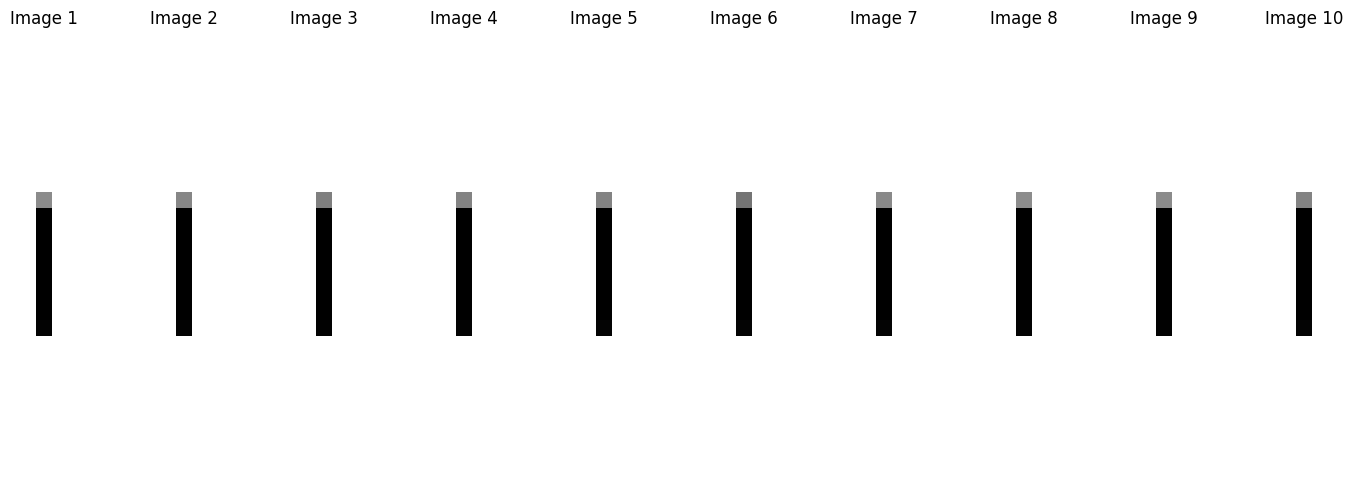

In [ ]:
# num_images = len(aa)
# fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  # Adjust figsize for better visibility
# for i, ax in enumerate(axes):
#     ax.imshow(aa[i], cmap='gray')  # Use 'gray' if these are grayscale images
#     ax.axis('off')  # Hide axes for better visualization
#     ax.set_title(f"Image {i+1}")

# plt.tight_layout()
# plt.show()

In [65]:
predictions = np.argmax(aa)
predictions


np.int64(196)

In [84]:
import numpy as np

class Neuron:
    def __init__(self, bias):
        self.bias = bias
        self.weights = []

    def sigmoid(self, x):
        """Numerically stable sigmoid."""
        return 1 / (1 + np.exp(-np.clip(x, -100, 100)))

    def sum_input_to_hidden(self):
        """Calculate weighted sum + bias."""
        weighted_sum = sum(self.input[i] * self.weights[i] for i in range(len(self.input)))
        return weighted_sum + self.bias

    def cost(self, input_data):
        """Forward propagation: calculate output."""
        self.input = input_data
        self.output = self.sigmoid(self.sum_input_to_hidden())
        return self.output

    def error_wrt_output(self, target_op):
        """Error derivative with respect to output."""
        return -(target_op - self.output)

    def error_wrt_input(self):
        """Derivative of activation function."""
        return self.output * (1 - self.output)

    def total_error(self, target_op):
        """Total error for a neuron."""
        return self.error_wrt_input() * self.error_wrt_output(target_op)


class Network:
    def __init__(self, hidden_layer, bias):
        self.network = []
        self.bias = bias if bias is not None else np.random.rand()
        for _ in range(hidden_layer):
            self.network.append(Neuron(self.bias))

    def forward(self, input_data):
        """Forward propagation for the network."""
        outputs = [neuron.cost(input_data) for neuron in self.network]
        return outputs


class AllNetwork:
    def __init__(self, n_input_layer, n_hidden_layer, n_output_layer, hidden_weights, output_weights, hidden_bias, output_bias):
        self.hidden_l_network = Network(n_hidden_layer, hidden_bias)
        self.output_l_network = Network(n_output_layer, output_bias)
        self.n_input_layer = n_input_layer
        self.add_weights(self.hidden_l_network, hidden_weights, n_input_layer)
        self.add_weights(self.output_l_network, output_weights, n_hidden_layer)

    def add_weights(self, layer, weights, num_inputs):
        """Initialize weights for a network layer."""
        count = 0
        for neuron in layer.network:
            neuron.weights = weights[count:count + num_inputs]
            count += num_inputs

    def forward_hidden_op(self, input_data):
        """Forward propagation through hidden and output layers."""
        hidden_output = self.hidden_l_network.forward(input_data)
        output = self.output_l_network.forward(hidden_output)
        return output

    def back_propagation(self, input_data, target_op, learning_rate=0.5):
        """Backpropagation to update weights and biases."""
        # Forward pass
        hidden_output = self.hidden_l_network.forward(input_data)
        final_output = self.output_l_network.forward(hidden_output)

        # Output layer deltas
        output_deltas = []
        for i in range(len(target_op)):
            error_wrt_input = self.output_l_network.network[i].error_wrt_input()
            output_deltas.append((target_op[i] - final_output[i]) * error_wrt_input)

        # Hidden layer deltas
        hidden_deltas = []
        for i in range(len(self.hidden_l_network.network)):
            weighted_sum = sum(
                output_deltas[j] * self.output_l_network.network[j].weights[i]
                for j in range(len(self.output_l_network.network))
            )
            hidden_deltas.append(weighted_sum * self.hidden_l_network.network[i].error_wrt_input())

        # Update output layer weights and biases
        for i, neuron in enumerate(self.output_l_network.network):
            for j in range(len(neuron.weights)):
                neuron.weights[j] += learning_rate * output_deltas[i] * hidden_output[j]
            neuron.bias += learning_rate * output_deltas[i]

        # Update hidden layer weights and biases
        for i, neuron in enumerate(self.hidden_l_network.network):
            for j in range(len(neuron.weights)):
                neuron.weights[j] += learning_rate * hidden_deltas[i] * input_data[j]
            neuron.bias += learning_rate * hidden_deltas[i]

    def calculate_total_error(self, dataset):
        """Compute total error for the dataset."""
        total_error = 0
        for input_data, target_op in dataset:
            outputs = self.forward_hidden_op(input_data)
            total_error += sum(0.5 * (target_op[i] - outputs[i]) ** 2 for i in range(len(target_op)))
        return total_error


In [85]:
# Initialize neural network parameters
n_input = 3
n_hidden = 4
n_output = 2
hidden_weights = [0.15, 0.2, 0.35, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]
output_weights = [0.45, 0.5, 0.55, 0.6, 0.4, 0.35, 0.3, 0.25]
hidden_bias = 0.35
output_bias = 0.6

# Create a network
network = AllNetwork(n_input, n_hidden, n_output, hidden_weights, output_weights, hidden_bias, output_bias)

# Sample dataset
dataset = [([0.05, 0.1, 0.2], [0.01, 0.99])]

# Train the network
for epoch in range(1000):
    for input_data, target_op in dataset:
        network.back_propagation(input_data, target_op, learning_rate=0.5)
    if epoch % 100 == 0:
        error = network.calculate_total_error(dataset)
        print(f"Epoch {epoch}, Total Error: {error:.6f}")

# Predict using the trained network
sample_input = [0.05, 0.1, 0.2]
output = network.forward_hidden_op(sample_input)
print("Predicted Output:", output)


Epoch 0, Total Error: 0.374310
Epoch 100, Total Error: 0.003950
Epoch 200, Total Error: 0.001612
Epoch 300, Total Error: 0.000944
Epoch 400, Total Error: 0.000639
Epoch 500, Total Error: 0.000469
Epoch 600, Total Error: 0.000362
Epoch 700, Total Error: 0.000290
Epoch 800, Total Error: 0.000238
Epoch 900, Total Error: 0.000199
Predicted Output: [np.float64(0.02321167966823035), np.float64(0.9771681221210514)]


In [ ]:
aa=mnist_network.forward_hidden_op(X_test[2])
len(aa)

10

In [87]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

class Neuron:
    def __init__(self, bias):
        self.bias = bias
        self.weights = []

    def sigmoid(self, x):
        """Numerically stable sigmoid."""
        return 1 / (1 + np.exp(-np.clip(x, -100, 100)))

    def sum_input_to_hidden(self):
        """Calculate weighted sum + bias."""
        return sum(self.input[i] * self.weights[i] for i in range(len(self.input))) + self.bias

    def cost(self, input_data):
        """Forward propagation: calculate output."""
        self.input = input_data
        self.output = self.sigmoid(self.sum_input_to_hidden())
        return self.output

    def error_wrt_output(self, target_op):
        """Error derivative with respect to output."""
        return -(target_op - self.output)

    def error_wrt_input(self):
        """Derivative of activation function."""
        return self.output * (1 - self.output)


class Network:
    def __init__(self, num_neurons, bias):
        self.network = [Neuron(bias) for _ in range(num_neurons)]

    def forward(self, input_data):
        """Forward propagation for the network."""
        return [neuron.cost(input_data) for neuron in self.network]


class AllNetwork:
    def __init__(self, n_input, n_hidden, n_output, hidden_bias, output_bias):
        self.hidden_layer = Network(n_hidden, hidden_bias)
        self.output_layer = Network(n_output, output_bias)
        self.initialize_weights(self.hidden_layer, n_input)
        self.initialize_weights(self.output_layer, n_hidden)

    def initialize_weights(self, layer, num_inputs):
        """Randomly initialize weights for neurons."""
        for neuron in layer.network:
            neuron.weights = np.random.uniform(-0.5, 0.5, num_inputs).tolist()

    def forward_hidden_op(self, input_data):
        """Forward propagation through the network."""
        hidden_output = self.hidden_layer.forward(input_data)
        output = self.output_layer.forward(hidden_output)
        return hidden_output, output

    def back_propagation(self, input_data, target_op, learning_rate=0.01):
        """Backpropagation to update weights and biases."""
        # Forward pass
        hidden_output, final_output = self.forward_hidden_op(input_data)

        # Calculate output layer deltas
        output_deltas = [(target_op[i] - final_output[i]) * self.output_layer.network[i].error_wrt_input()
                         for i in range(len(target_op))]

        # Calculate hidden layer deltas
        hidden_deltas = []
        for i in range(len(self.hidden_layer.network)):
            weighted_sum = sum(output_deltas[j] * self.output_layer.network[j].weights[i]
                               for j in range(len(self.output_layer.network)))
            hidden_deltas.append(weighted_sum * self.hidden_layer.network[i].error_wrt_input())

        # Update output layer weights and biases
        for i, neuron in enumerate(self.output_layer.network):
            for j in range(len(neuron.weights)):
                neuron.weights[j] += learning_rate * output_deltas[i] * hidden_output[j]
            neuron.bias += learning_rate * output_deltas[i]

        # Update hidden layer weights and biases
        for i, neuron in enumerate(self.hidden_layer.network):
            for j in range(len(neuron.weights)):
                neuron.weights[j] += learning_rate * hidden_deltas[i] * input_data[j]
            neuron.bias += learning_rate * hidden_deltas[i]

    def calculate_total_error(self, dataset):
        """Compute total error for the dataset."""
        total_error = 0
        for input_data, target_op in dataset:
            _, outputs = self.forward_hidden_op(input_data)
            total_error += sum(0.5 * (target_op[i] - outputs[i]) ** 2 for i in range(len(target_op)))
        return total_error

    def predict(self, input_data):
        """Make predictions based on the forward pass."""
        _, outputs = self.forward_hidden_op(input_data)
        return np.argmax(outputs)

    def evaluate(self, x_test, y_test):
        """Evaluate the accuracy of the network."""
        correct = 0
        for input_data, label in zip(x_test, y_test):
            prediction = self.predict(input_data)
            if prediction == label:
                correct += 1
        return correct / len(x_test)


# Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Initialize network
n_input = 784
n_hidden = 128
n_output = 10
hidden_bias = 0.35
output_bias = 0.6

network = AllNetwork(n_input, n_hidden, n_output, hidden_bias, output_bias)

# Train the network
epochs = 5
batch_size = 32
learning_rate = 0.01

for epoch in range(epochs):
    for i in range(0, len(x_train), batch_size):
        batch_x = x_train[i:i + batch_size]
        batch_y = y_train_one_hot[i:i + batch_size]
        for input_data, target_op in zip(batch_x, batch_y):
            network.back_propagation(input_data, target_op, learning_rate)

    # Calculate error for this epoch
    total_error = network.calculate_total_error(list(zip(x_train[:100], y_train_one_hot[:100])))
    print(f"Epoch {epoch + 1}/{epochs}, Total Error: {total_error:.4f}")

# Evaluate on test data
accuracy = network.evaluate(x_test[:100], y_test[:100])
print(f"Test Accuracy: {accuracy:.2%}")


KeyboardInterrupt: 